In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans,MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px

In [8]:
df5 = pd.read_csv("Customer Dataset/df5.csv")

In [9]:
df5.head()

CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  3.735304           0.597837   4.568506          0.000000   
1  C10002  8.071989           0.646627   0.000000          0.000000   
2  C10003  7.822504           0.693147   6.651791          6.651791   
3  C10004  7.419183           0.492477   7.313220          7.313220   
4  C10005  6.707735           0.693147   2.833213          2.833213   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.154151   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             0.693147   
3                0.000000      5.331694             0.080042   
4                0.000000      0.000000             0.080042   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.080042   
1                    0.000000                          0.000000   
2                    0.693147                          0.000000   
3                    0.080042                          0.000000   
4                    0.080042                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       1.098612      6.908755   
1                0.223144          1.609438       0.000000      8.853808   
2                0.000000          0.000000       2.564949      8.922792   
3                0.080042          0.693147       0.693147      8.922792   
4                0.000000          0.000000       0.693147      7.090910   

   PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  5.312231          0.000000  2.564949  
1  8.319725          0.200671  2.564949  
2  6.434654          0.000000  2.564949  
3  0.000000          0.000000  2.564949  
4  6.521114          0.000000  2.564949

# This project explores customer behavior using an unsupervised learning approach applied to a credit card usage dataset. The dataset contains sixteen numerical features, including balance patterns, purchase behavior, cash advance activity, credit limits, and payment habits, that together describe how customers interact with their credit accounts. Since no labels or predefined customer categories are provided, the goal is to uncover meaningful structure within the data by applying and comparing several clustering algorithms such as K‑Means, MiniBatch K‑Means, MeanShift, and others. Through preprocessing, dimensionality reduction, and model evaluation, we aim to identify the most suitable clustering method for segmenting customers into coherent groups that can support downstream business insights and decision‑making.

<span style="font-size:20px; font-weight:bold;color:blue;">Modeling </span>

In [10]:
df5=df5.drop('CUST_ID', axis=1)
scaler = StandardScaler().fit(df5)
df_trans = scaler.transform(df5)
df_trans = pd.DataFrame(df_trans, columns = df5.columns)
df_trans

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.206806          -0.149665  -0.114972         -0.987947   
1     0.948760           0.178979  -1.682202         -0.987947   
2     0.824752           0.492332   0.599700          1.061127   
3     0.624280          -0.859360   0.826604          1.264879   
4     0.270652           0.492332  -0.710266         -0.115180   
...        ...                ...        ...               ...   
8937 -1.381338           0.492332   0.265354         -0.987947   
8938 -1.569880           0.492332   0.275626         -0.987947   
8939 -1.475600          -0.093768   0.026015         -0.987947   
8940 -1.735713          -0.093768  -1.682202         -0.987947   
8941 -0.119167          -0.735763   0.718407          1.167722   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.394063     -0.930753            -0.747705   
1                  -1.087815      1.528579            -1.303676   
2                  -1.087815     -0.930753             1.196272   
3                  -1.087815      0.564237            -1.014990   
4                  -1.087815     -0.930753            -1.014990   
...                      ...           ...                  ...   
8937                0.753676     -0.930753             1.196272   
8938                0.763390     -0.930753             1.196272   
8939                0.527373     -0.930753             0.882451   
8940               -1.087815      0.085940            -1.303676   
8941               -1.087815      0.429829             0.538701   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.732926                         -0.674614   
1                      -0.732926                         -0.958599   
2                       2.465581                         -0.958599   
3                      -0.363572                         -0.958599   
4                      -0.363572                         -0.958599   
...                          ...                               ...   
8937                   -0.732926                          1.191927   
8938                   -0.732926                          1.191927   
8939                   -0.732926                          0.853774   
8940                   -0.732926                         -0.958599   
8941                    1.624265                         -0.958599   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.724353         -0.810087      -0.580745     -1.447223   
1                   0.699187          0.784410      -1.380647      0.926187   
2                  -0.724353         -0.810087       0.486900      1.010362   
3                  -0.213724         -0.123375      -0.875965      1.010362   
4                  -0.724353         -0.810087      -0.875965     -1.224952   
...                      ...               ...            ...           ...   
8937               -0.724353         -0.810087       0.036176     -1.447223   
8938               -0.724353         -0.810087       0.036176     -1.447223   
8939               -0.724353         -0.810087      -0.076062     -1.447223   
8940                0.259050          0.278326      -1.380647     -2.291803   
8941                1.110908          0.278326       0.933303     -1.224952   

      PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.825108         -0.556244  0.347209  
1     1.065205          0.391906  0.347209  
2    -0.119627         -0.556244  0.347209  
3    -4.164028         -0.556244  0.347209  
4    -0.065284         -0.556244  0.347209  
...        ...               ...       ...  
8937 -0.525619          1.359542 -4.404712  
8938 -0.629454         -0.556244 -4.404712  
8939 -1.392181          0.498089 -4.404712  
8940 -1.662075          0.498089 -4.404712  
8941 -1.548405         -0.556244 -4.404712  

[8942 rows x 16 columns]

For clustering, we use different algorithm and evaluate each of them to make sure we could achieve best clustering for out dataset.

<span style="font-size:18px; font-weight:bold;color:magenta;">KMeans </span>

K-Means is an unsupervised machine learning algorithm used to group data into clusters based on similarity. It works by first choosing a number of clusters, k, and then randomly placing centroids (cluster centers) in the data space. Each data point is assigned to the nearest centroid, forming temporary clusters. The algorithm then recalculates the centroid of each cluster as the mean of its points and repeats the assignment process. This cycle continues until the centroids stabilize and no longer move significantly. The result is a partition of the dataset into k clusters where points within the same cluster are more similar to each other than to points in other clusters. K-Means is widely used because it is simple, fast, and effective for discovering hidden patterns in unlabeled data, though it works best when clusters are roughly spherical and of similar size.


In [11]:
!pip install kneed

C:\Users\Afroo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Afroo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Afroo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Afroo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Afroo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Elbow detected at k=5
    k        Inertia  Silhouette  Calinski-Harabasz
0   2  103814.262711    0.270612        3380.693194
1   3   87529.848357    0.235115        2836.126441
2   4   78296.655255    0.235710        2464.827251
3   5   69676.448185    0.240152        2353.510273
4   6   63639.571071    0.244921        2230.718454
5   7   59900.041375    0.248732        2067.729832
6   8   56811.384204    0.237099        1937.873292
7   9   54075.751509    0.196944        1837.713385
8  10   51846.470414    0.197557        1746.237869


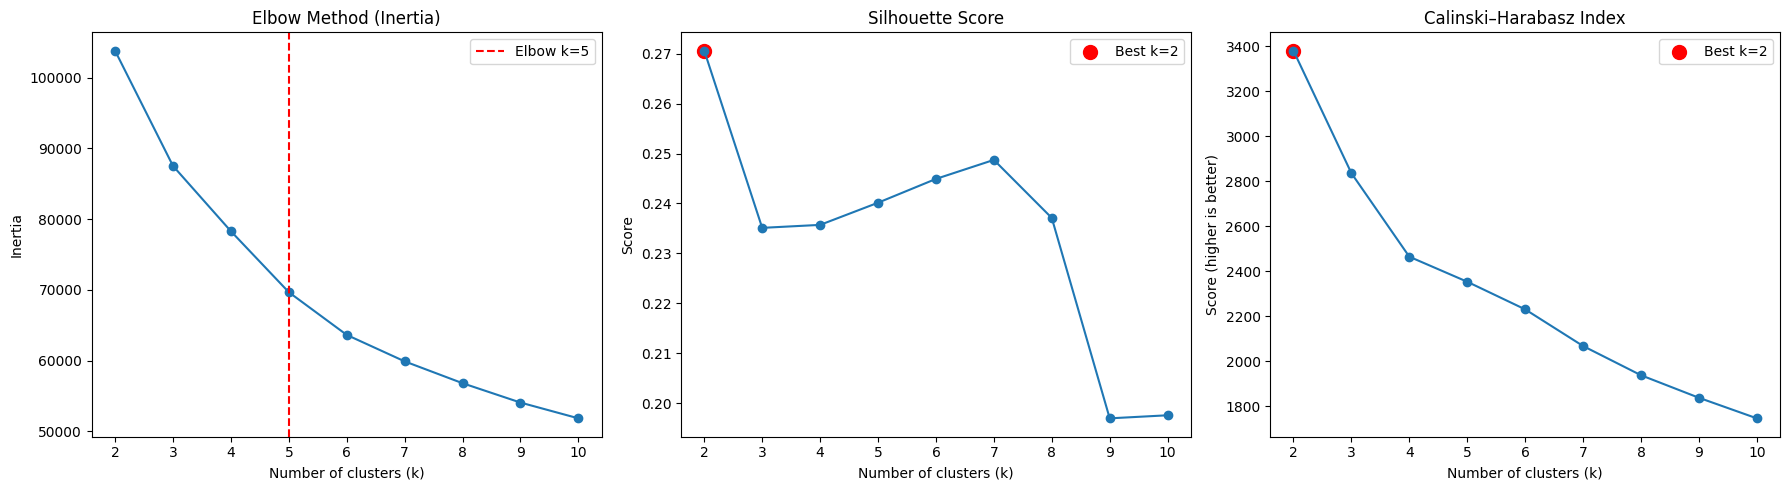

In [13]:
from kneed import KneeLocator   #elbow
k_values = range(2, 11)

inertias = []
silhouette_scores = []
calinski_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(df_trans)   
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_trans, labels))
    calinski_scores.append(calinski_harabasz_score(df_trans, labels))

# Detect elbow
knee = KneeLocator(k_values, inertias, curve="convex", direction="decreasing")
elbow_k = knee.knee
print(f"Elbow detected at k={elbow_k}")

# Results table
results_df = pd.DataFrame({
    "k": list(k_values),
    "Inertia": inertias,
    "Silhouette": silhouette_scores,
    "Calinski-Harabasz": calinski_scores
})
print(results_df)

# Find best k by metrics
best_silhouette_k = results_df.loc[results_df["Silhouette"].idxmax(), "k"]
best_calinski_k = results_df.loc[results_df["Calinski-Harabasz"].idxmax(), "k"]


plt.figure(figsize=(18,5))
# Elbow plot
plt.subplot(1,3,1)
plt.plot(k_values, inertias, marker='o')
plt.axvline(x=elbow_k, color='red', linestyle='--', label=f"Elbow k={elbow_k}")
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.legend()

# Silhouette plot
plt.subplot(1,3,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.scatter(best_silhouette_k, max(silhouette_scores), color='red', s=100, label=f"Best k={best_silhouette_k}")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.legend()

# Calinski plot
plt.subplot(1,3,3)
plt.plot(k_values, calinski_scores, marker='o')
plt.scatter(best_calinski_k, max(calinski_scores), color='red', s=100, label=f"Best k={best_calinski_k}")
plt.title("Calinski–Harabasz Index")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score (higher is better)")
plt.legend()
plt.savefig("Customer Dataset Figures/Modelling/kmeans_evaluation_metrics.png",
            dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

Based on the score and visualization, the best number of clusters for inertia is 5; the Silhouette score suggests 2 and 7, and the Calinski-Harabasz score suggests 2 or 3. Since we prefer to decrease the number of clusters and also look at the elbow, we also observe a bend in k=3, so we decide to have a model based on 3 clusters.

In [14]:
# Build final model
kmeans_final = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, random_state=42)
labels = kmeans_final.fit_predict(df_trans)
# Add cluster labels back to your original dataframe for analysis
df6=df5.copy()
df6["Cluster"] = labels
df6

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8937  3.384170           0.693147   5.677165          0.000000   
8938  3.004851           0.693147   5.707110          0.000000   
8939  3.194529           0.606136   4.979489          0.000000   
8940  2.671218           0.606136   0.000000          0.000000   
8941  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8937                5.677165      0.000000             0.693147   
8938                5.707110      0.000000             0.693147   
8939                4.979489      0.000000             0.606136   
8940                0.000000      3.625907             0.000000   
8941                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8937                    0.000000                          0.606136   
8938                    0.000000                          0.606136   
8939                    0.000000                          0.510826   
8940                    0.000000                          0.000000   
8941                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8937                0.000000          0.000000       1.945910      6.908755   
8938                0.000000          0.000000       1.945910      6.908755   
8939                0.000000          0.000000       1.791759      6.908755   
8940                0.154151          1.098612       0.000000      6.216606   
8941                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  PRC_FULL_PAYMENT    TENURE  Cluster  
0     5.312231          0.000000  2.564949        2  
1     8.319725          0.200671  2.564949        1  
2     6.434654          0.000000  2.564949        0  
3     0.000000          0.000000  2.564949        1  
4     6.521114          0.000000  2.564949        2  
...        ...               ...       ...      ...  
8937  5.788719          0.405465  1.945910        2  
8938  5.623517          0.000000  1.945910        2  
8939  4.410016          0.223144  1.945910        2  
8940  3.980615          0.223144  1.945910        1  
8941  4.161464          0

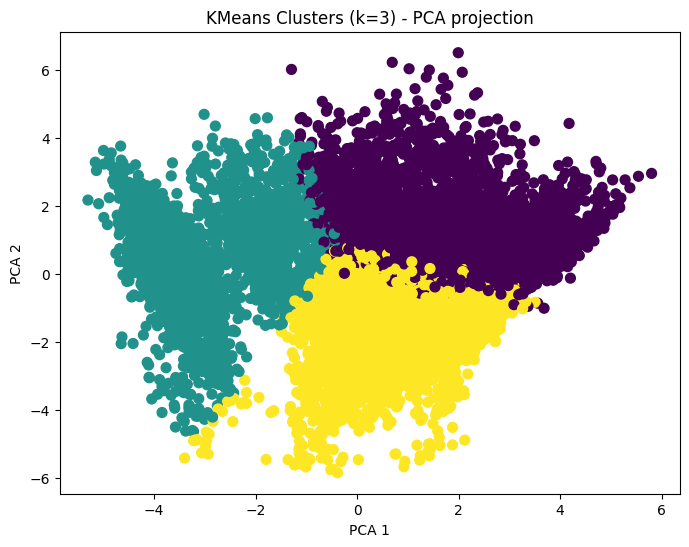

In [15]:
#Dimensional reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_trans)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
plt.title("KMeans Clusters (k=3) - PCA projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.savefig("Customer Dataset Figures/Modelling/KMeans Clusters (k=3) - PCA projection.png",
            dpi=300, bbox_inches='tight')
plt.show()

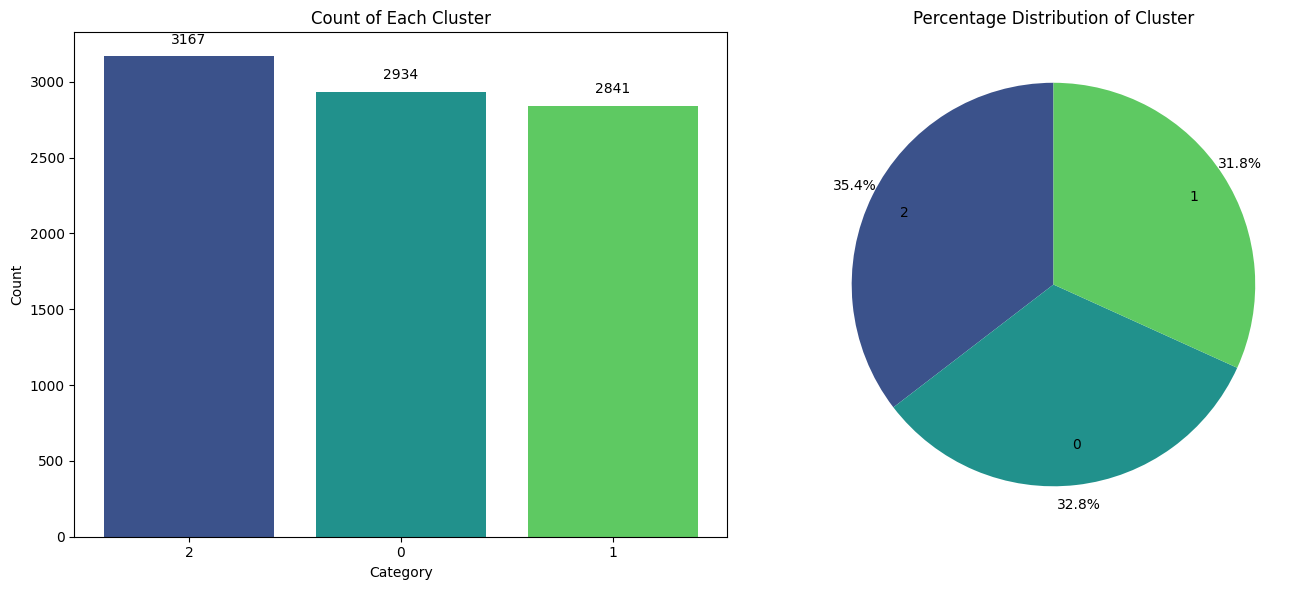

In [16]:
counts = df6['Cluster'].value_counts(dropna=False)
labels = counts.index.astype(str)   
values = counts.values
colors = sns.color_palette('viridis', len(labels))
color_map = dict(zip(labels, colors))
bar_colors = [color_map[l] for l in labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].bar(labels, values, color=bar_colors)
axes[0].set_title('Count of Each Cluster')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Category')
# Count labels 
for i, v in enumerate(values):
    axes[0].text(i, v + max(values) * 0.02, str(v),
                 ha='center', va='bottom', fontsize=10)

axes[1].pie(
    values,
    labels=labels,
    colors=bar_colors,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=1.1,     
    labeldistance=0.8,  
    textprops={'fontsize': 10}
)
axes[1].set_title('Percentage Distribution of Cluster')
plt.savefig("Customer Dataset Figures/Modelling/Count of clustersKMeans Clusters.png",
            dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

K-Means is not a strong algorithm for clustering since it lacks flexibility, and we can also manually change the number of clusters, so in the following, we evaluate other algorithms for clustering.

<span style="font-size:18px; font-weight:bold;color:magenta;">MiniBatchKMeans </span>

Elbow detected at k=7
    k        Inertia  Silhouette  Calinski-Harabasz
0   2  104667.079306    0.261092        3313.808019
1   3   94498.699164    0.202149        2332.906976
2   4   81824.238550    0.203990        2293.723352
3   5   72688.980186    0.236287        2191.258739
4   6   70247.310690    0.186670        1868.783294
5   7   61611.215420    0.238278        1976.071380
6   8   59021.372891    0.225770        1821.574125
7   9   57953.498846    0.203570        1651.750524
8  10   55571.710255    0.188154        1570.007151


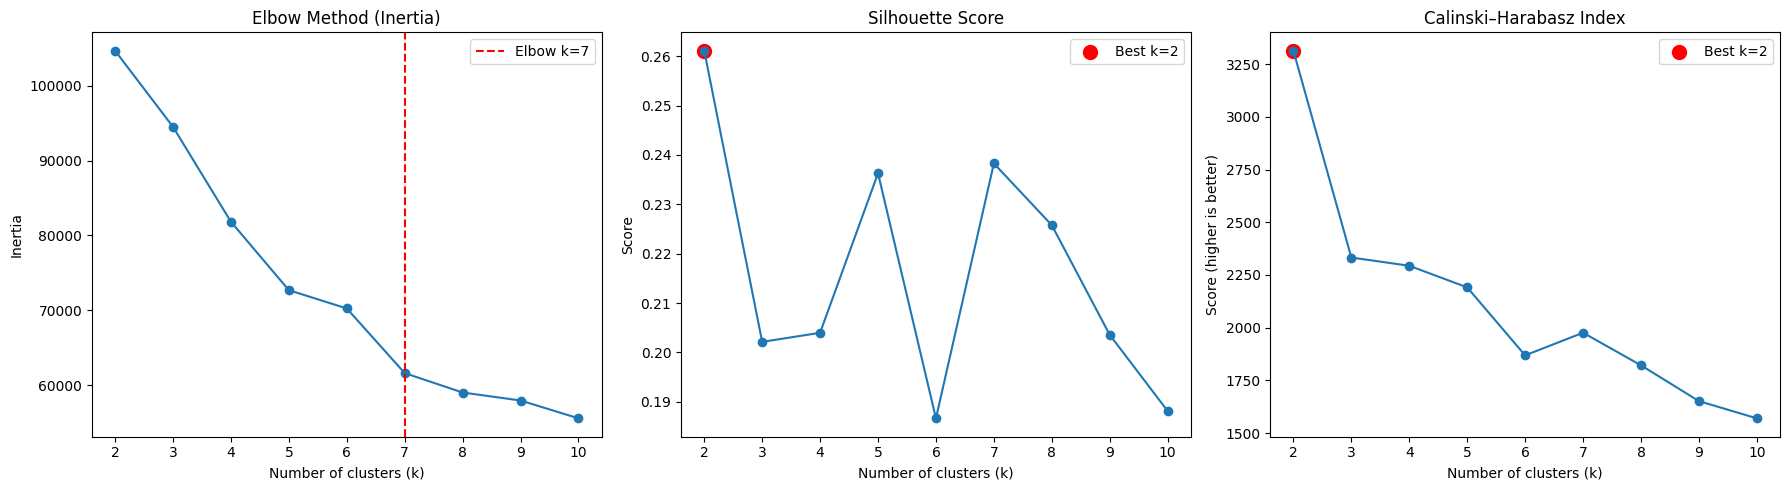

In [17]:
k_values = range(2, 11)
inertias = []
silhouette_scores = []
calinski_scores = []
for k in k_values:
    mbkmeans = MiniBatchKMeans(n_clusters=k,batch_size=2048, init="random", n_init=10, max_iter=300, random_state=42)
    labels = mbkmeans.fit_predict(df_trans)   
    inertias.append(mbkmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_trans, labels))
    calinski_scores.append(calinski_harabasz_score(df_trans, labels))
# Detect elbow
knee = KneeLocator(k_values, inertias, curve="convex", direction="decreasing")
elbow_k = knee.knee
print(f"Elbow detected at k={elbow_k}")
# Results table
results_df = pd.DataFrame({
    "k": list(k_values),
    "Inertia": inertias,
    "Silhouette": silhouette_scores,
    "Calinski-Harabasz": calinski_scores
})
print(results_df)
# Find best k by metrics
best_silhouette_k = results_df.loc[results_df["Silhouette"].idxmax(), "k"]
best_calinski_k = results_df.loc[results_df["Calinski-Harabasz"].idxmax(), "k"]
plt.figure(figsize=(18,5))
# Elbow plot
plt.subplot(1,3,1)
plt.plot(k_values, inertias, marker='o')
plt.axvline(x=elbow_k, color='red', linestyle='--', label=f"Elbow k={elbow_k}")
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.legend()
# Silhouette plot
plt.subplot(1,3,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.scatter(best_silhouette_k, max(silhouette_scores), color='red', s=100, label=f"Best k={best_silhouette_k}")
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score")
plt.legend()
# Calinski plot
plt.subplot(1,3,3)
plt.plot(k_values, calinski_scores, marker='o')
plt.scatter(best_calinski_k, max(calinski_scores), color='red', s=100, label=f"Best k={best_calinski_k}")
plt.title("Calinski–Harabasz Index")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Score (higher is better)")
plt.legend()
plt.tight_layout()
plt.savefig("Customer Dataset Figures/Modelling/MiniBatchkmeans_evaluation_metrics.png",
            dpi=300, bbox_inches='tight')
plt.show()


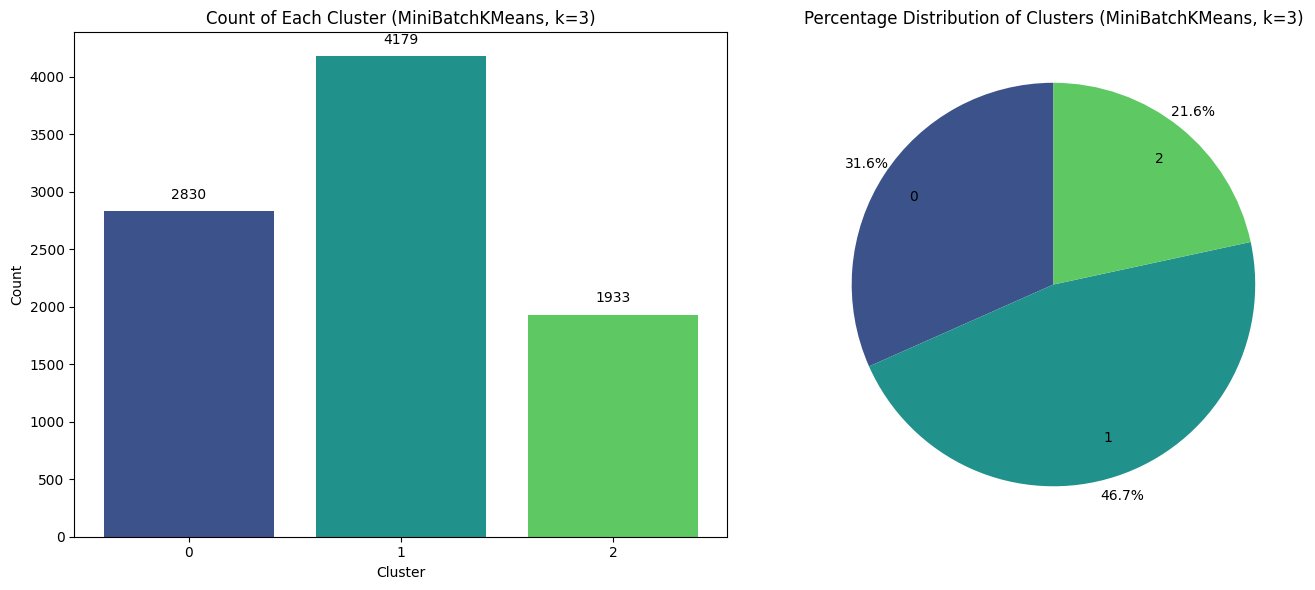

In [18]:
mbkmeans_final = MiniBatchKMeans(
    n_clusters=3,
    batch_size=2048,
    init="random",     
    n_init=10,
    max_iter=300,
    random_state=42
)
model_labels = mbkmeans_final.fit_predict(df_trans)  
# Cluster column addition
df7 = df5.copy()
df7["Cluster"] = model_labels
# bar/pie plots
counts = df7['Cluster'].value_counts(dropna=False).sort_index()  
cluster_ids = counts.index.astype(str) 
values = counts.values
#Colors
colors = sns.color_palette('viridis', len(cluster_ids))
color_map = dict(zip(cluster_ids, colors))
bar_colors = [color_map[cid] for cid in cluster_ids]

#Plots: bar + pie
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar
axes[0].bar(cluster_ids, values, color=bar_colors)
axes[0].set_title('Count of Each Cluster (MiniBatchKMeans, k=3)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Cluster')
for i, v in enumerate(values):
    axes[0].text(i, v + max(values) * 0.02, str(v),
                 ha='center', va='bottom', fontsize=10)
# Pie
axes[1].pie(
    values,
    labels=cluster_ids,
    colors=bar_colors,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=1.1,
    labeldistance=0.8,
    textprops={'fontsize': 10}
)
axes[1].set_title('Percentage Distribution of Clusters (MiniBatchKMeans, k=3)')

plt.tight_layout()
plt.savefig("Customer Dataset Figures/Modelling/Count of clusters MiniBatchKMeans Clusters.png",
            dpi=300, bbox_inches='tight')
plt.show()

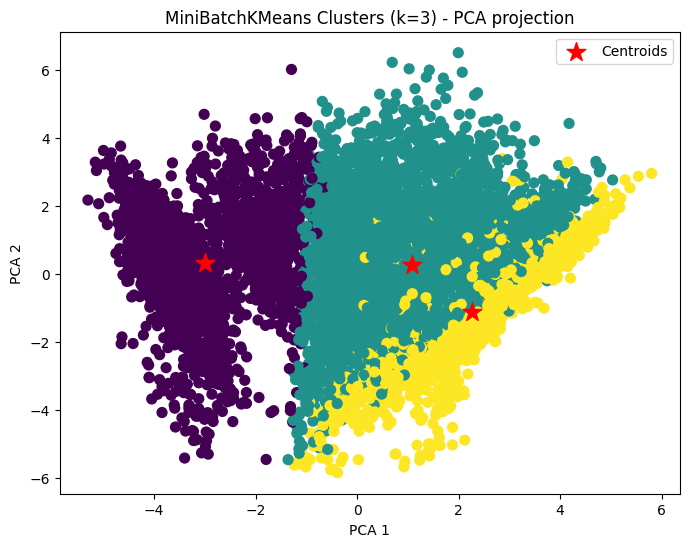

In [19]:
# Dimensional reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_trans.to_numpy())
# Cluster labels from your final model
labels = mbkmeans_final.labels_
# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
# Plot centroids (projected into PCA space)
centers_pca = pca.transform(mbkmeans_final.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], 
            marker='*', color='red', s=200, label="Centroids")
plt.title("MiniBatchKMeans Clusters (k=3) - PCA projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.savefig("Customer Dataset Figures/Modelling/MinibatchKMeans Clusters (k=3) - PCA projection.png",
            dpi=300, bbox_inches='tight')
plt.show()

<span style="font-size:18px; font-weight:bold;color:magenta;">Mean Shift </span>

Mean Shift is a nonparametric clustering algorithm that does not require choosing the number of clusters. It treats data points as samples from an underlying density and iteratively “shifts” each point toward regions of highest density (modes) using a kernel window of size called bandwidth. Points that converge to the same mode form a cluster, and the mode becomes the cluster center. The quality and number of clusters depend primarily on the bandwidth: larger bandwidth merges nearby groups; smaller bandwidth produces more, finer clusters.

In [20]:
bandwidth = estimate_bandwidth(df_trans, quantile=0.3, n_samples=1000)
print("Estimated bandwidth:", bandwidth)

Estimated bandwidth: 4.626275742979131


In [23]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels_ms = ms.fit_predict(df_trans)
n_clusters = len(set(labels_ms))
print("Clusters found:", n_clusters)

Clusters found: 1


This bandwidth is too large for our dataset and with this bandwidth we can have only one cluster so we consider this bandwidth as a starting point and change the bandwidth to have more cluster and then evaluate the scores of each bandwidth.

In [24]:
# we write a loop around bandwidth we got
bandwidths = [2.0, 2.5, 3.0, 3.5,3.6,3.7,3.75,3.8,3.9, 4.0,4.1,4.2, 4.26, 5.0]
results = []
for bw in bandwidths:
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    labels = ms.fit_predict(df_trans)
    n_clusters = len(np.unique(labels))
    # Evaluation only if more than 1 cluster
    if n_clusters > 1:
        sil = silhouette_score(df_trans, labels)
        ch = calinski_harabasz_score(df_trans, labels)
    else:
        sil, ch = None, None
    
    results.append({
        "bandwidth": bw,
        "clusters": n_clusters,
        "silhouette": sil,
        "calinski_harabasz": ch
    })
results_df = pd.DataFrame(results)
print(results_df)

    bandwidth  clusters  silhouette  calinski_harabasz
0        2.00        15    0.182593         945.259409
1        2.50        11    0.197802        1074.737345
2        3.00         5    0.256760        1186.533375
3        3.50         4    0.249795        1240.340969
4        3.60         3    0.258037        1715.720880
5        3.70         3    0.255641        1708.625279
6        3.75         2    0.266218        3354.380261
7        3.80         1         NaN                NaN
8        3.90         1         NaN                NaN
9        4.00         1         NaN                NaN
10       4.10         1         NaN                NaN
11       4.20         1         NaN                NaN
12       4.26         1         NaN                NaN
13       5.00         1         NaN                NaN


Bandwidth between 2-3.5 gives us too many clusters. Bandwidth=3.75 has the highest score both in silhouette and calinski_harabasz, but it is only 2 cluster. Bandwidth=3.60 has the second highest scores with 3 clusters so based on datasert we can go either with 2 or 3 clusters. 

In [25]:
ms = MeanShift(bandwidth=3.6, bin_seeding=True)  
labels_ms = ms.fit_predict(df_trans)
df_ms = df5.copy()
df_ms["Cluster_MS"] = labels_ms
counts = df_ms["Cluster_MS"].value_counts().sort_index()
print("Cluster counts:")
print(counts)

Cluster counts:
Cluster_MS
0    5810
1    3101
2      31
Name: count, dtype: int64


❌
* Since there are only 31 counts in the third cluster, having only 2 clusters is more reasonable. 

In [26]:
ms = MeanShift(bandwidth=3.75, bin_seeding=True)  
labels_ms = ms.fit_predict(df_trans)
df_ms = df5.copy()
df_ms["Cluster_MS"] = labels_ms
counts = df_ms["Cluster_MS"].value_counts().sort_index()
print("Cluster counts:")
print(counts)

Cluster counts:
Cluster_MS
0    5589
1    3353
Name: count, dtype: int64


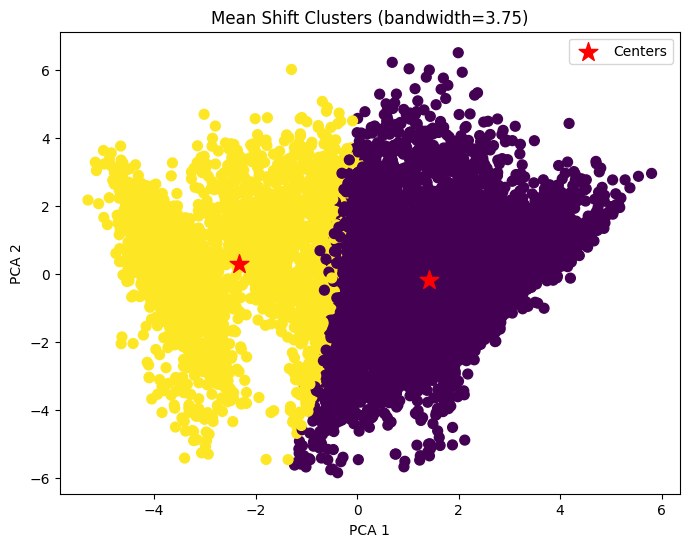

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_trans.to_numpy())
centers_pca = pca.transform(ms.cluster_centers_)
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_ms, cmap='viridis', s=50)
plt.scatter(centers_pca[:,0], centers_pca[:,1], marker='*', color='red', s=200, label="Centers")
plt.title(f"Mean Shift Clusters (bandwidth={ms.bandwidth})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.savefig("Customer Dataset Figures/Modelling/Mean Shift- PCA projection.png",
            dpi=300, bbox_inches='tight')
plt.show()

<span style="font-size:18px; font-weight:bold;color:magenta;">DBSCAN (Density-Based Spatial Clustering of Applications with Noise) </span>


DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is an unsupervised clustering algorithm that groups together points that are closely packed in high‑density regions while marking points in low‑density areas as noise. Unlike KMeans, it does not require you to specify the number of clusters in advance; instead, it relies on two parameters: eps, which defines the maximum distance between two points to be considered neighbors, and min_samples, which sets the minimum number of points required to form a dense region. Points that meet these criteria form a cluster, while those that do not are labeled as outliers with a cluster ID of -1. This makes DBSCAN particularly powerful for datasets with irregular shapes, varying densities, or noise, since it can discover clusters of arbitrary form and automatically exclude outliers. The challenge lies in tuning eps and min_samples properly: too small an eps may fragment the data into many clusters, while too large an eps may merge everything into one cluster. Thus, evaluation involves iteratively adjusting these parameters, checking the number of clusters formed, analyzing cluster sizes, and validating results with metrics like silhouette score and visualizations such as PCA scatter plots.


In DBSCAN, the two key parameters are eps (neighborhood radius) and min_samples (minimum points to form a dense cluster). To estimate a good value for eps, we first fix min_samples (commonly 4–5 or equal to the dataset’s dimensionality + 1) and then compute the distance from each point to its kth nearest neighbor. By sorting and plotting these distances, we get the k‑distance graph, where the “elbow” point indicates a natural cutoff between dense regions and sparse noise. That cutoff is used as the candidate eps value for DBSCAN, ensuring clusters are formed in high‑density areas while points beyond this threshold are treated as noise.


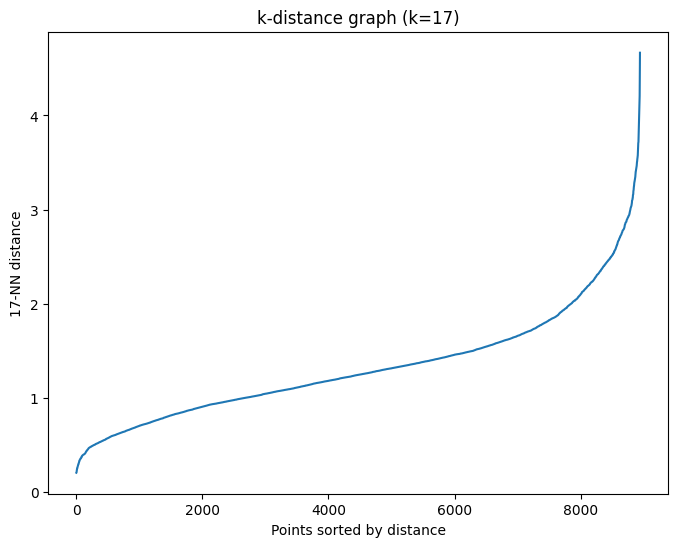

In [28]:
# In DBSCAN, two parameters affect our scores 
# Start with choosing min_samples
min_samples = 17
# Fit NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_trans)
distances, indices = neighbors_fit.kneighbors(df_trans)
# Take the kth distance (last column)
k_distances = np.sort(distances[:, -1])
# plot
plt.figure(figsize=(8,6))
plt.plot(k_distances)
plt.title(f"k-distance graph (k={min_samples})")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-NN distance")
plt.show()

In [29]:
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve="convex", direction="increasing")
eps_value = kneedle.knee_y
print("Suggested eps:", eps_value)

Suggested eps: 3.1027339101110334


In [30]:
dbscan = DBSCAN(eps=3.1027, min_samples=17)
labels_db = dbscan.fit_predict(df_trans)

In [31]:
df_db = df5.copy()
df_db["Cluster_DBSCAN"] = labels_db
print(df_db["Cluster_DBSCAN"].value_counts().sort_index())

Cluster_DBSCAN
-1      15
 0    8927
Name: count, dtype: int64


In [32]:
n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print("Number of clusters found:", n_clusters)
if n_clusters > 1:
    sil = silhouette_score(df_trans, labels_db)
    ch = calinski_harabasz_score(df_trans, labels_db)
    print("Silhouette:", sil)
    print("Calinski–Harabasz:", ch)
else:
    print("Only one cluster found — try adjusting eps/min_samples.")

Number of clusters found: 1
Only one cluster found — try adjusting eps/min_samples.


In [33]:
# write a loop over min_sample , eps
results = []
for min_samples in [2,3,4,5,7,8, 10,12, 15, 17, 20,25,30,35,38,40,45,50,55,60,90]:
    # k-distance graph
    neighbors = NearestNeighbors(n_neighbors=min_samples).fit(df_trans)
    distances, _ = neighbors.kneighbors(df_trans)
    k_distances = np.sort(distances[:, -1])
    
    # find elbow automatically
    kneedle = KneeLocator(range(len(k_distances)), k_distances,
                          curve="convex", direction="increasing")
    eps_value = kneedle.knee_y
    
    # DBSCAN
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
    labels = dbscan.fit_predict(df_trans)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # evaluation
    if n_clusters > 1:
        sil = silhouette_score(df_trans, labels)
        ch = calinski_harabasz_score(df_trans, labels)
    else:
        sil, ch = None, None
    
    results.append({
        "min_samples": min_samples,
        "eps": eps_value,
        "clusters": n_clusters,
        "silhouette": sil,
        "calinski_harabasz": ch
    })

import pandas as pd
print(pd.DataFrame(results))

    min_samples       eps  clusters  silhouette  calinski_harabasz
0             2  2.129926        14   -0.080028           8.336722
1             3  2.044664         5    0.066919          19.031223
2             4  2.251155         1         NaN                NaN
3             5  2.322031         1         NaN                NaN
4             7  2.490371         1         NaN                NaN
5             8  2.603712         1         NaN                NaN
6            10  2.440574         1         NaN                NaN
7            12  2.674369         1         NaN                NaN
8            15  2.846892         1         NaN                NaN
9            17  3.102734         1         NaN                NaN
10           20  3.131656         1         NaN                NaN
11           25  3.190142         1         NaN                NaN
12           30  3.525990         1         NaN                NaN
13           35  3.626480         1         NaN               

* DBSCAN is so sensitive to data, and apparently this algorithm does not fit our dataset. Since this pattern suggests the data doesn’t have strong density‑based separation.

<span style="font-size:18px; font-weight:bold;color:magenta;">Guassian Mixture Models (GMM) </span>


A Gaussian Mixture Model (GMM) is a probabilistic clustering algorithm that assumes your data is generated from a mixture of several Gaussian (normal) distributions. Unlike KMeans, which assigns each point to a single cluster, GMM provides soft clustering: every point gets a probability of belonging to each cluster. This makes GMM more flexible, since clusters can be elliptical, overlapping, and of different sizes, rather than just spherical. It’s especially useful when your data has complex shapes or overlapping regions that KMeans struggles to separate.


- AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are measures used to evaluate how well a statistical model fits the data, while penalizing unnecessary complexity.
- Both are based on the likelihood of the model (how probable the data is under that model), but they add a penalty term for the number of parameters:
- AIC: AIC=2k-2\ln (L)
- k = number of parameters, L = likelihood.
- More lenient: allows more complex models if they improve fit.
- BIC: BIC=\ln (n)k-2\ln (L)
- n = sample size.
- Stronger penalty for complexity, especially with large datasets.


- In clustering with Gaussian Mixture Models (GMM), the main question is: how many clusters (components) should we use?
- AIC and BIC help answer this by balancing:
- Fit quality: Does the model explain the data well?
- Simplicity: Does it avoid overfitting by using too many clusters?
- Lower AIC/BIC values mean a better trade‑off.
- By plotting AIC and BIC across different numbers of clusters, we look for the “elbow” or minimum point where adding more clusters doesn’t significantly improve the fit. That’s the sweet spot for choosing n_components


   n_components            BIC            AIC  Silhouette  Calinski_Harabasz
0             2   43107.083691   40942.036751    0.229564        2665.343137
1             3  -93126.304349  -96377.424016    0.181162        2037.544118
2             4 -114618.827737 -118956.020131    0.173591        1764.275449
3             5 -213416.200070 -218839.465191    0.181905        1514.753471
4             6 -242974.498373 -249483.836222    0.194917        1570.519962
5             7 -318412.118418 -326007.528993    0.190566        1533.457553
6             8 -338417.346466 -347098.829769    0.181026        1362.771796
7             9 -331318.860049 -341086.416079    0.185012        1236.928423
8            10 -342492.550059 -353346.178816    0.157994        1104.330525


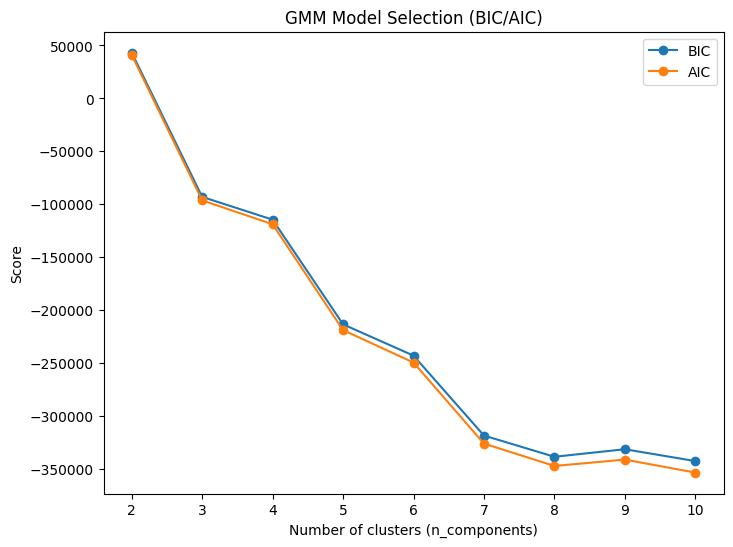

In [34]:
results = []
# wite a loop to find best number of clusters
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(df_trans)
    # Model selection criteria(lower better)
    bic = gmm.bic(df_trans)
    aic = gmm.aic(df_trans)
    # Clustering metrics
    sil = silhouette_score(df_trans, labels)
    ch = calinski_harabasz_score(df_trans, labels)
    
    results.append({
        "n_components": k,
        "BIC": bic,
        "AIC": aic,
        "Silhouette": sil,
        "Calinski_Harabasz": ch
    })

# Table of results
results_df = pd.DataFrame(results)
print(results_df)
# Plot BIC and AIC curves
plt.figure(figsize=(8,6))
plt.plot(results_df["n_components"], results_df["BIC"], label="BIC", marker="o")
plt.plot(results_df["n_components"], results_df["AIC"], label="AIC", marker="o")
plt.xlabel("Number of clusters (n_components)")
plt.ylabel("Score")
plt.title("GMM Model Selection (BIC/AIC)")
plt.legend()
plt.savefig("Customer Dataset Figures/Modelling/GMM.png",
            dpi=300, bbox_inches='tight')
plt.show()

Looking at this table, the model fit (AIC/BIC) improves dramatically as the number of components increases, but clustering quality metrics tell a different story: silhouette scores remain low across all options, peaking modestly at 2 clusters (0.23) and recovering slightly around 6 clusters (0.19), while Calinski–Harabasz steadily declines from 2665 at 2 clusters to ~1100 at 10 clusters. This suggests that although statistical fit favors more components, the data does not separate cleanly into well‑defined groups; the most balanced choice is around 6 components, where BIC/AIC are strongly reduced yet silhouette and CH remain relatively stable, indicating overlapping but interpretable clusters.


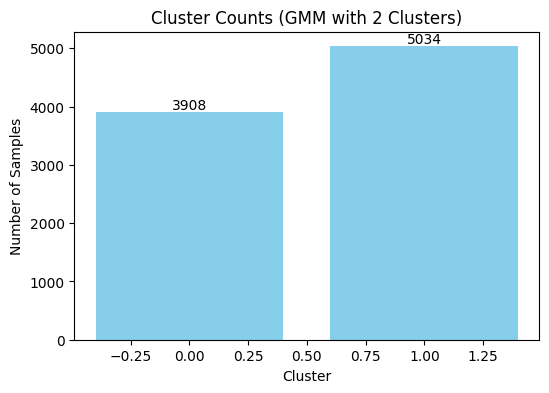

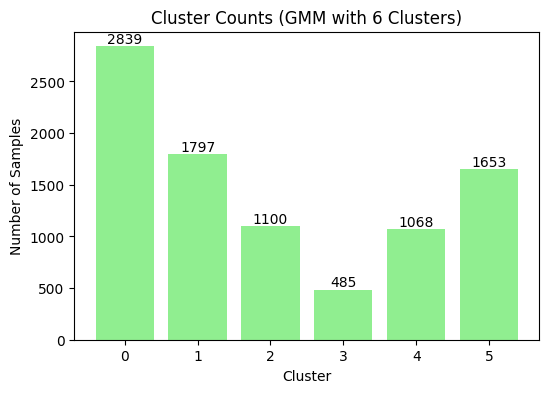

In [38]:
# since for the scores 2 clusters is the highest and based on BIC/AIC the lower is better, we decided to try both 2,6 clusters
# --- GMM with 2 clusters ---
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
labels2 = gmm2.fit_predict(df_trans)
counts2 = pd.Series(labels2).value_counts().sort_index()
plt.figure(figsize=(6,4))
bars = plt.bar(counts2.index, counts2.values, color='skyblue')
plt.title("Cluster Counts (GMM with 2 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
for bar, count in zip(bars, counts2.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(count), ha='center', va='bottom')
plt.savefig("Customer Dataset Figures/Modelling/GMM-Clusters Count(2).png",
            dpi=300, bbox_inches='tight')
plt.show()

# --- GMM with 6 clusters ---
gmm6 = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
labels6 = gmm6.fit_predict(df_trans)
counts6 = pd.Series(labels6).value_counts().sort_index()
plt.figure(figsize=(6,4))
bars = plt.bar(counts6.index, counts6.values, color='lightgreen')
plt.title("Cluster Counts (GMM with 6 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
for bar, count in zip(bars, counts6.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(count), ha='center', va='bottom')
plt.savefig("Customer Dataset Figures/Modelling/GMM-Clusters Count(6).png",
            dpi=300, bbox_inches='tight')
plt.show()

<span style="font-size:18px; font-weight:bold;color:magenta;">Hierarchical Clustering </span>

Hierarchical clustering, often called agglomerative clustering, is a method that builds a tree‑like structure (dendrogram) of nested clusters by successively merging the closest points or groups of points until all data belongs to one cluster. Unlike algorithms such as KMeans or GMM, it doesn’t require you to predefine the number of clusters; instead, you can “cut” the dendrogram at different levels to reveal varying numbers of groups. The main parameters to consider are the linkage criterion (how distances between clusters are measured, e.g. ward, complete, average, single) and the number of clusters chosen when cutting the tree. To evaluate results, you look at metrics like silhouette score and Calinski–Harabasz index, and visually inspect the dendrogram for large vertical jumps that indicate natural separations. This makes hierarchical clustering especially useful when you want to explore the structure of your data at multiple resolutions rather than committing to a single cluster count upfront.


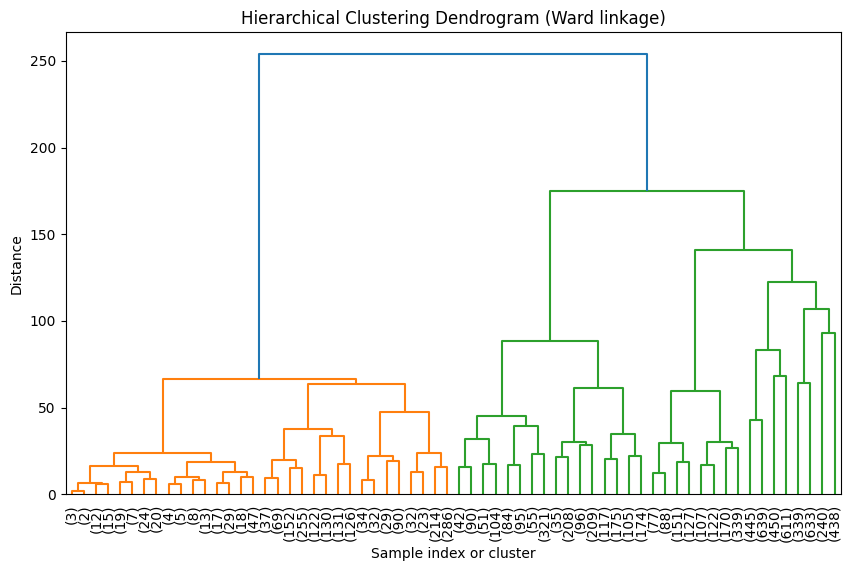

In [36]:
# Compute linkage matrix
# ward linkage minimizes variance within clusters (often best choice)
linked = linkage(df_trans, method='ward')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           truncate_mode='level', 
           p=5,                    
           leaf_rotation=90.,
           leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample index or cluster")
plt.ylabel("Distance")
plt.savefig("Customer Dataset Figures/Modelling/Hierarchical.png",
            dpi=300, bbox_inches='tight')
plt.show()

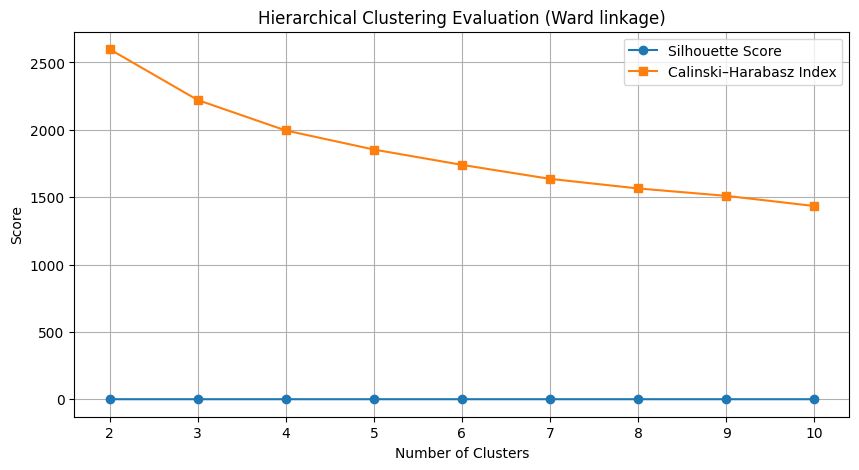

   n_clusters  Silhouette  Calinski_Harabasz
0           2    0.239071        2598.000876
1           3    0.190826        2220.972677
2           4    0.167996        1994.910198
3           5    0.188627        1853.434459
4           6    0.201664        1739.582009
5           7    0.212416        1635.804361
6           8    0.198872        1564.613741
7           9    0.185822        1509.698070
8          10    0.179264        1434.264491


In [37]:
# --- Loop over cluster counts ---
results = []
for k in range(2, 11):  # test 2 to 10 clusters
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hc.fit_predict(df_trans)
    sil = silhouette_score(df_trans, labels)
    ch = calinski_harabasz_score(df_trans, labels)
    results.append({"n_clusters": k, "Silhouette": sil, "Calinski_Harabasz": ch})
results_df = pd.DataFrame(results)

# plots
plt.figure(figsize=(10,5))
plt.plot(results_df["n_clusters"], results_df["Silhouette"], marker='o', label="Silhouette Score")
plt.plot(results_df["n_clusters"], results_df["Calinski_Harabasz"], marker='s', label="Calinski–Harabasz Index")
plt.title("Hierarchical Clustering Evaluation (Ward linkage)")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()
# table
print(results_df)

Cluster counts (Hierarchical, 2 clusters):
0    6937
1    2005
Name: count, dtype: int64


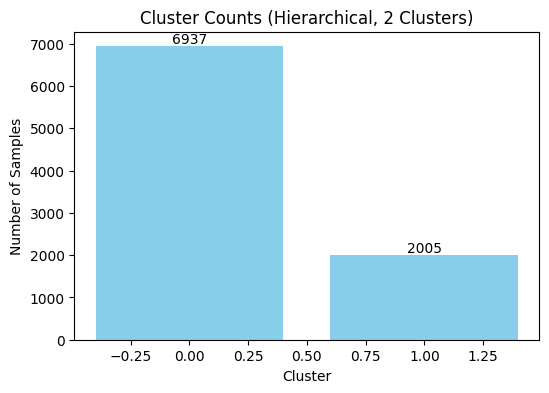

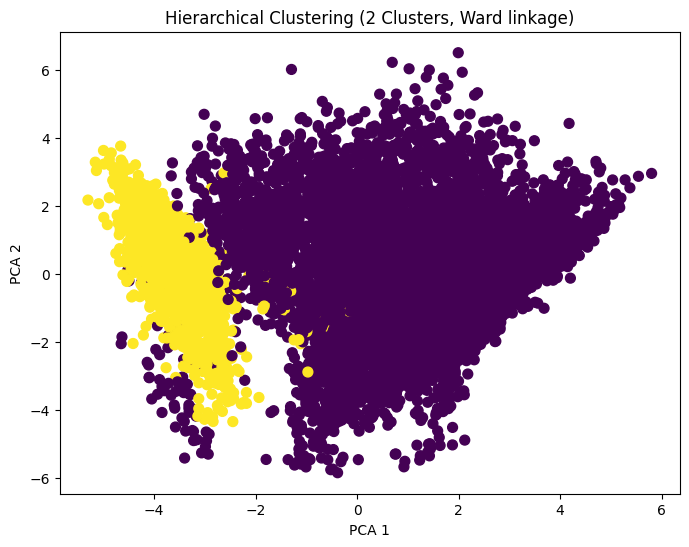

In [39]:
# 2 clusters
hc2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels2 = hc2.fit_predict(df_trans)
counts2 = pd.Series(labels2).value_counts().sort_index()
print("Cluster counts (Hierarchical, 2 clusters):")
print(counts2)

plt.figure(figsize=(6,4))
bars = plt.bar(counts2.index, counts2.values, color='skyblue')
plt.title("Cluster Counts (Hierarchical, 2 Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")

for bar, count in zip(bars, counts2.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(count), ha='center', va='bottom')
plt.savefig("Customer Dataset Figures/Modelling/Hierarchical Clusters,2.png",
            dpi=300, bbox_inches='tight')
plt.show()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_trans)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels2, cmap='viridis', s=50)
plt.title("Hierarchical Clustering (2 Clusters, Ward linkage)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.savefig("Customer Dataset Figures/Modelling/Hierarchical-PCA.png",
            dpi=300, bbox_inches='tight')
plt.show()

<span style="font-size:20px; font-weight:bold;color:blue;">Final Visualization </span>

## Between algorithms, K-Means with 3 clusters showed better distribution and clustering, and the algorithm also had higher scores. Therefore, we have already built out our model and called df6, and the final visualization would be based on this model.

In [40]:
kmeans_final = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, random_state=42)
labels = kmeans_final.fit_predict(df_trans)

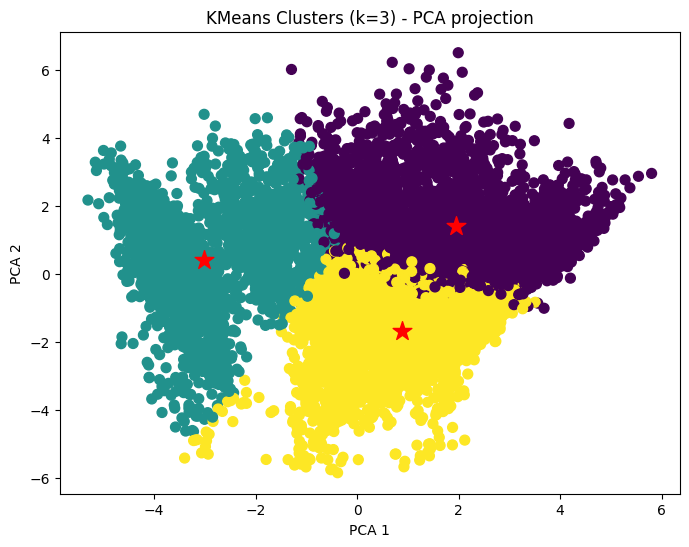

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_trans.to_numpy())
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1], 
            marker='*', color='red', s=200, label="Centroids")
plt.title("KMeans Clusters (k=3) - PCA projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

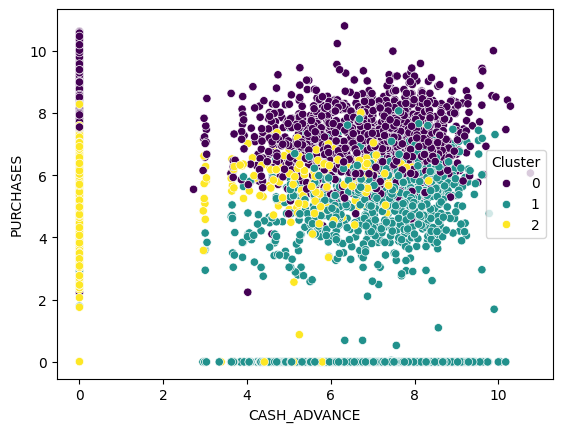

In [43]:
sns.scatterplot(data=df6, x='CASH_ADVANCE',y='PURCHASES',palette='viridis', hue='Cluster')
plt.savefig("Customer Dataset Figures/Modelling/Final Model Visualization 1.png",
            dpi=300, bbox_inches='tight')
plt.show()

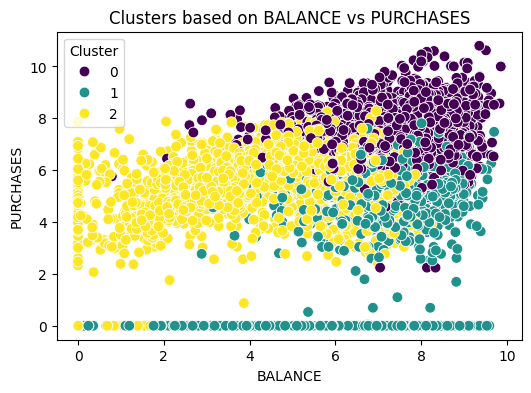

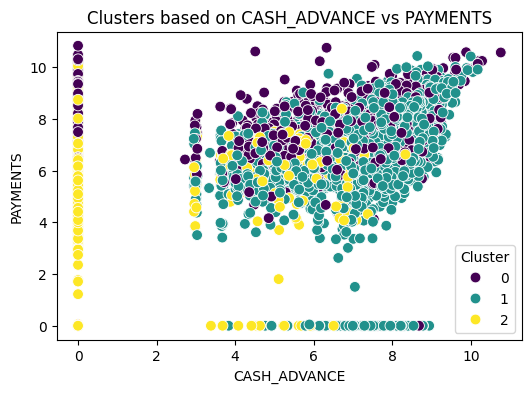

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df6, x="BALANCE", y="PURCHASES", hue="Cluster", palette="viridis", s=60)
plt.title("Clusters based on BALANCE vs PURCHASES")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend(title="Cluster")
plt.savefig("Customer Dataset Figures/Modelling/Final Model Visualization 2.png",
            dpi=300, bbox_inches='tight')
plt.show()
# 
plt.figure(figsize=(6,4))
sns.scatterplot(data=df6, x="CASH_ADVANCE", y="PAYMENTS", hue="Cluster", palette="viridis", s=60)
plt.title("Clusters based on CASH_ADVANCE vs PAYMENTS")
plt.xlabel("CASH_ADVANCE")
plt.ylabel("PAYMENTS")
plt.legend(title="Cluster")
plt.savefig("Customer Dataset Figures/Modelling/Final Model Visualization 3.png",
            dpi=300, bbox_inches='tight')
plt.show()

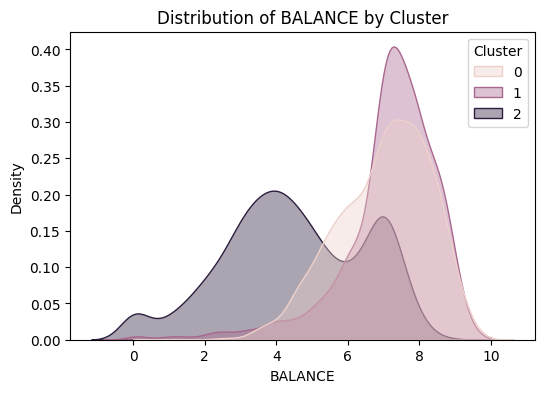

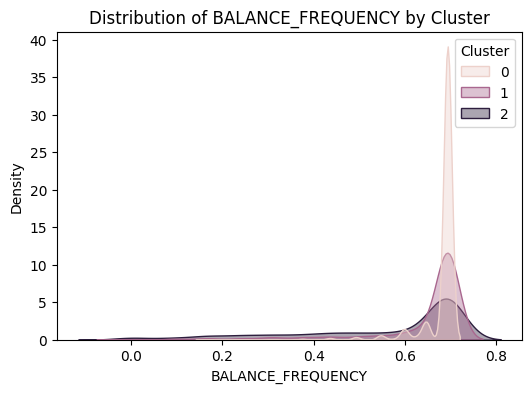

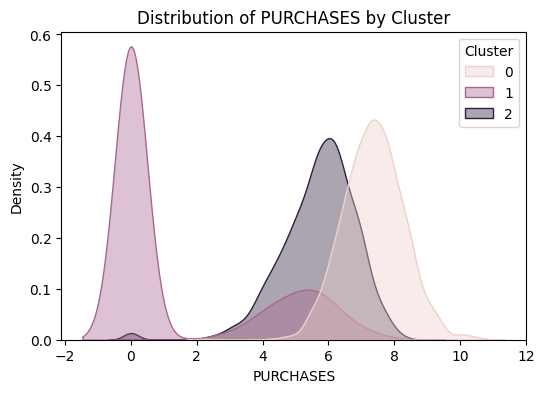

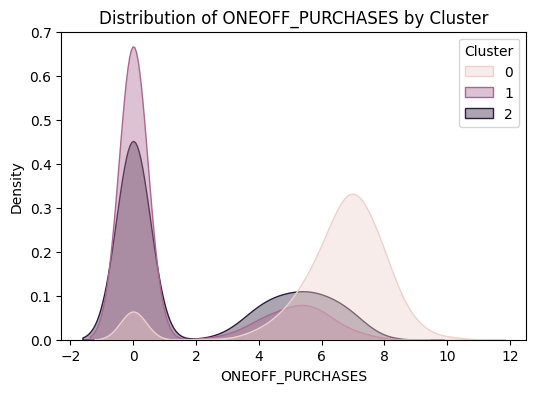

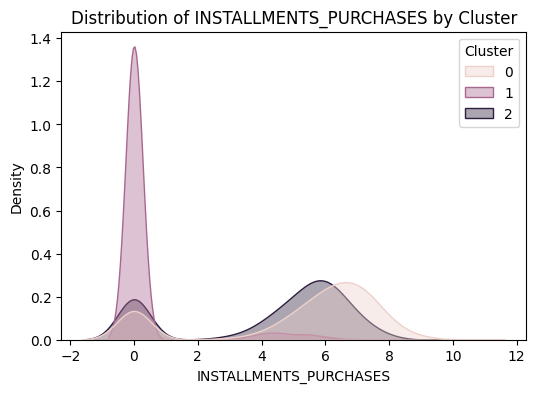

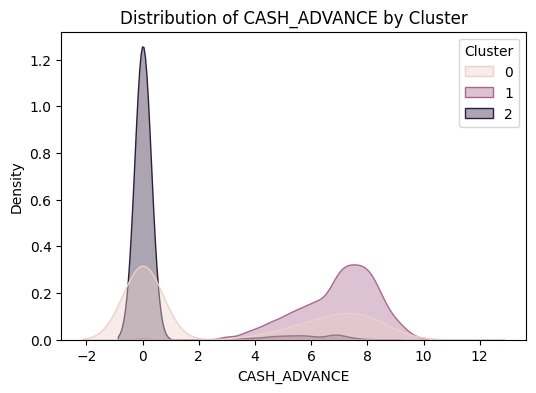

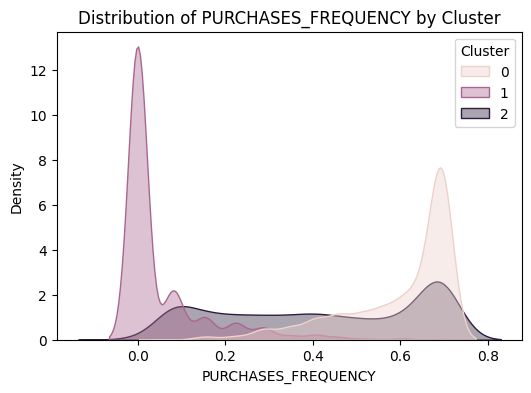

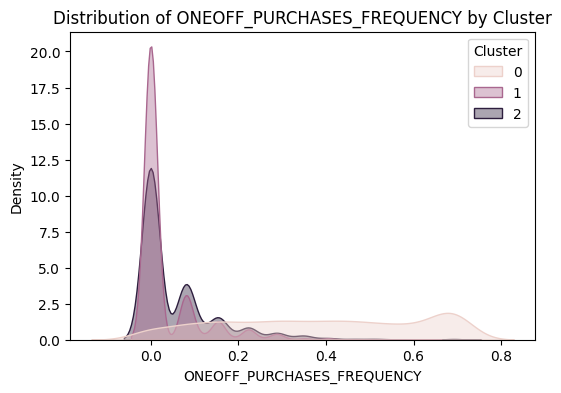

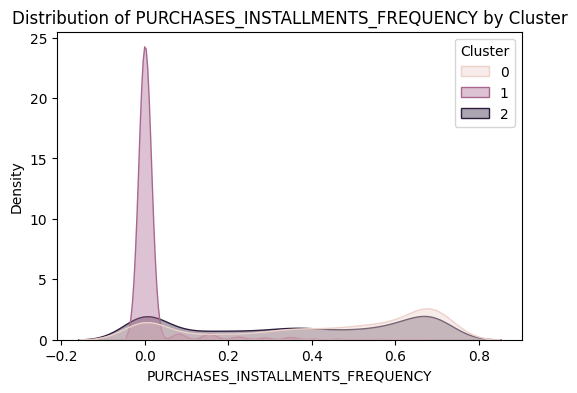

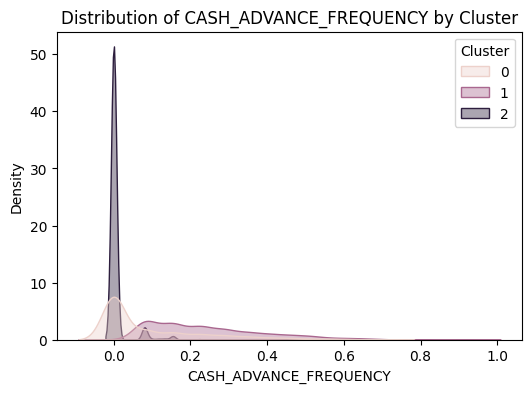

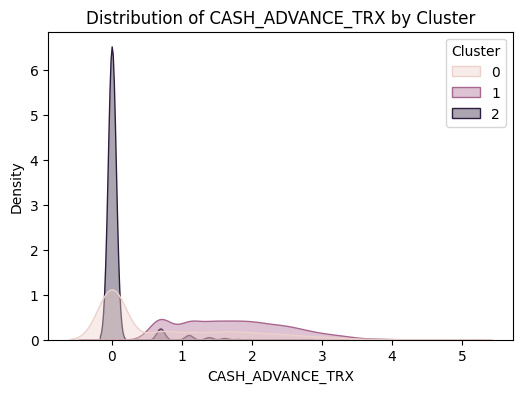

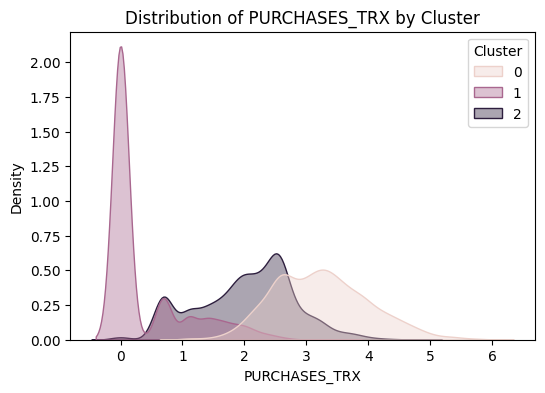

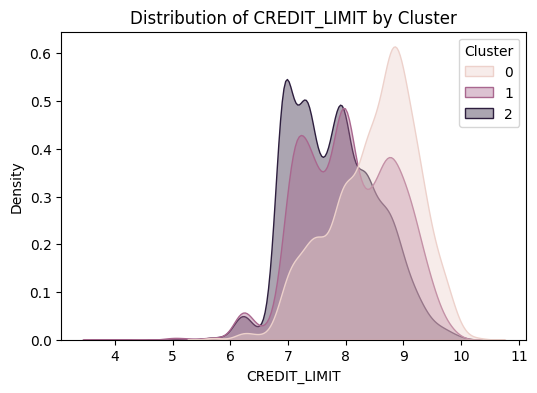

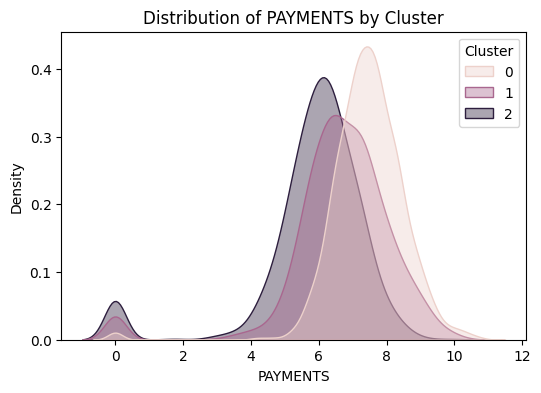

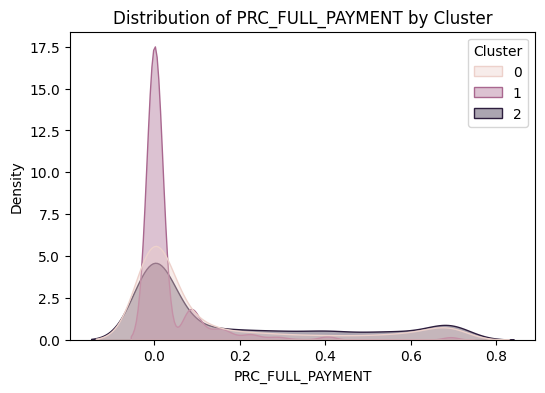

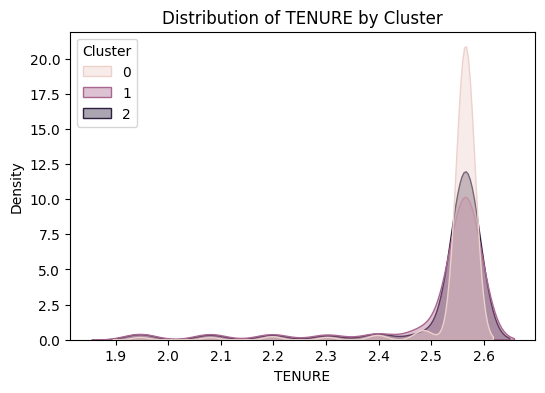

In [46]:
features = [
    "BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT",
    "PAYMENTS","PRC_FULL_PAYMENT","TENURE"
]

# Loop through features and plot KDE for each
for col in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df6, x=col, hue="Cluster", fill=True, common_norm=False, alpha=0.4)
    plt.title(f"Distribution of {col} by Cluster")
    plt.xlabel(col)
    plt.ylabel("Density")

    # Save each figure with the feature name
    filename = f"Customer Dataset Figures/Modelling/kde_{col}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()

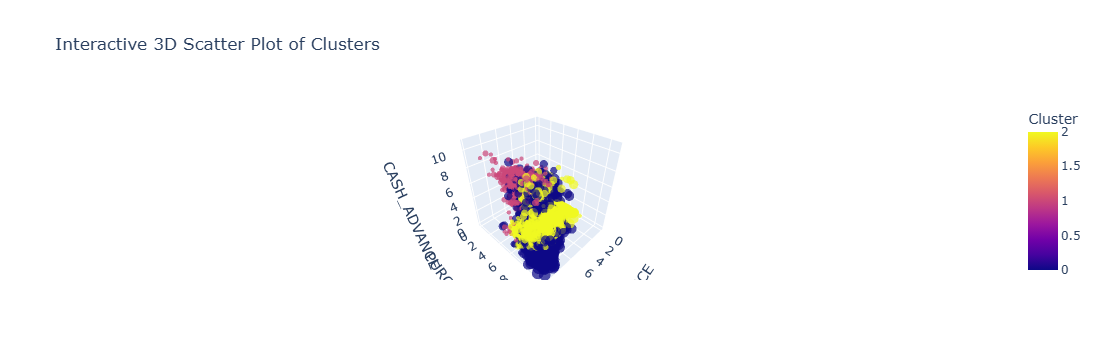

In [48]:
x_col = "BALANCE"
y_col = "PURCHASES"
z_col = "CASH_ADVANCE"
fig = px.scatter_3d(
    df6, 
    x=x_col, 
    y=y_col, 
    z=z_col, 
    color="Cluster", 
    size="PURCHASES_TRX",  # optional: scale point size by transaction count
    opacity=0.7,
    title="Interactive 3D Scatter Plot of Clusters"
)

fig.update_traces(marker=dict(line=dict(width=0)))  
fig.show()

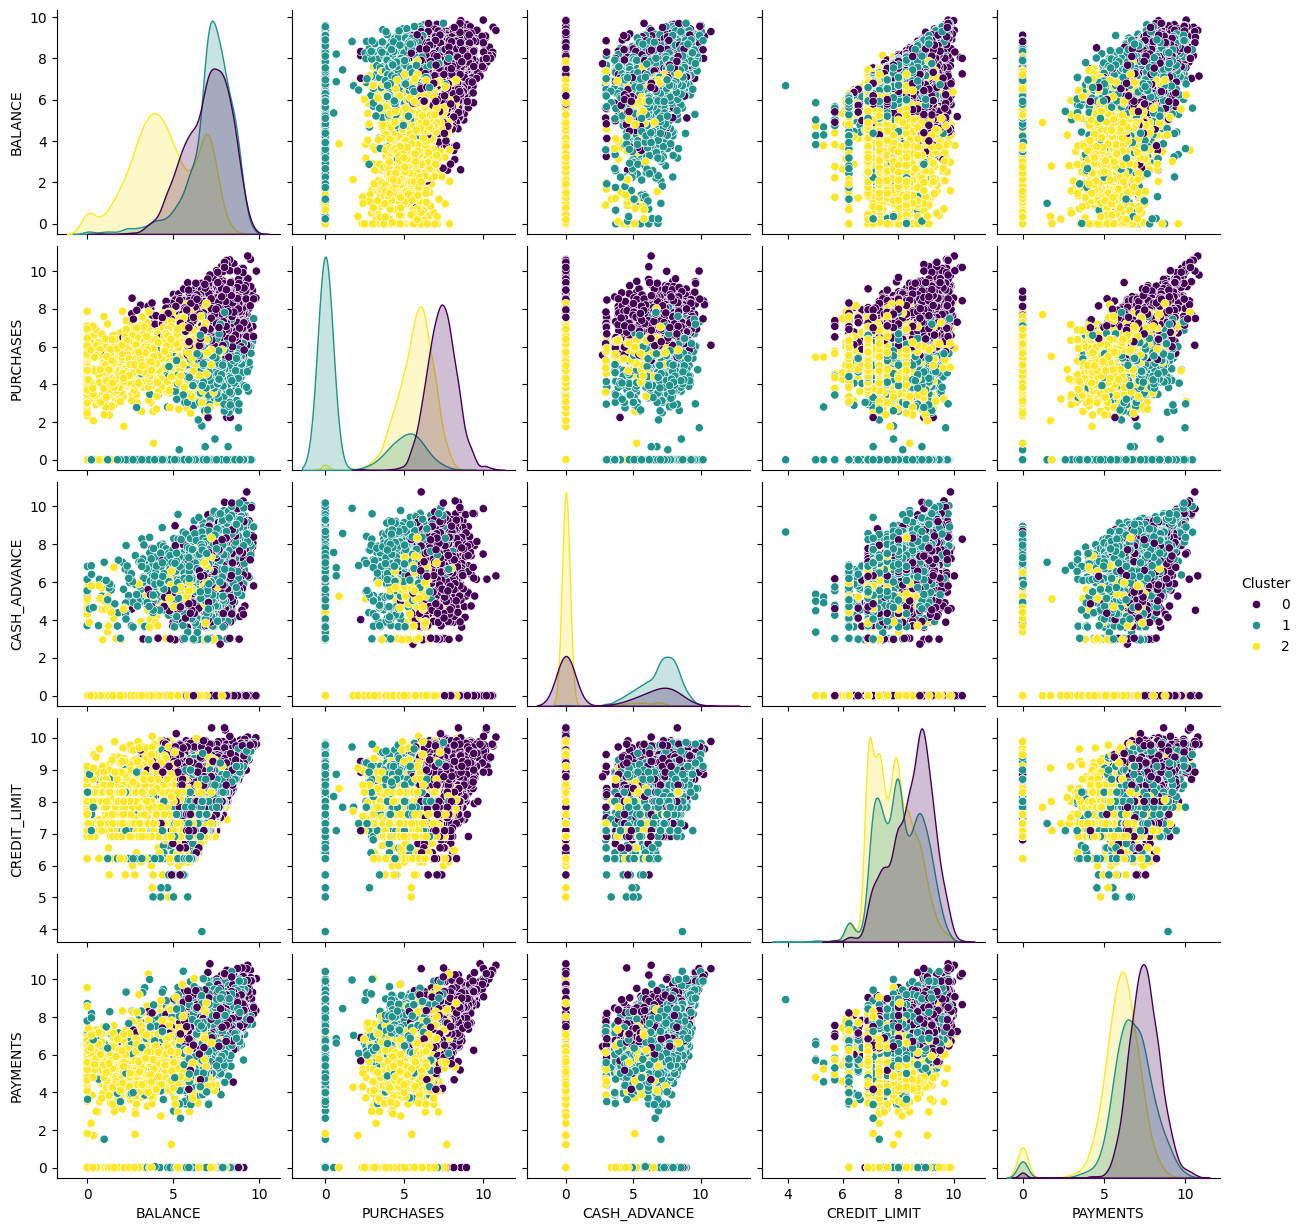

In [49]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS","Cluster"]
sns.pairplot( df6[ best_cols ], hue="Cluster",palette='viridis')